# 개념정리

- 계층적 트리 모형을 이용해 개별 개체들을 순차적, 계층적으로 유사한 개체 내지 그룹과 통합하여 군집화를 수행하는 알고리즘
- K-means 군집화와 달리 군집수를 사전에 정하지 않아도 됨 (Dendroggram 이용)
- 거리 또는 유사도를 기반으로 클러스터를 형성하는 알고리즘

## Agglomerative Method : 응집형 계층적클러스터링

- 각 데이터 지점에서 시작해 유사한 지점들을 함께 결합해 클러스터를 형성(Bottom-Up 방식)
- 연결기준에 따라 군집이 달라지므로 데이터 특성, 분포에 따라 적절히 변경하며 확인해야 한다.
- 연결기준(유클리디안 거리)
  1. single Linkage : 두 클러스터 내의 가장 가까운 점 사이의 거리
     - 먼 거리에 있는 이상한 데이터의 영향을 최소화할 수 있다.
     
  2. complete Linkage : 두 클러스터 내의 가장 먼 점 사이의 거리
     - 클러스터간 거리가 멀고 클러스터의 밀집도가 높을 결우 좋은 결과를 낸다.
  
  3. average Linkage : 두 클러스터 내의 모든 점 사이의 평균 거리
     - 무난한 방법이나 데이터에 노이즈가 많고 중심점이 명확하지 않으면 잘 동작하지 않을 수 있다.

# 필수 라이브러리 로딩

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from warnings import filterwarnings
import warnings

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='malgun gothic')

# 시각화 차트에 음수설정
mpl.rc('axes', unicode_minus = False)

# 오류경고
warnings.filterwarnings('ignore')



import seaborn as sns

# 차트 스타일지정     글꼴                    음수처리                        눈금
sns.set(font = 'malgun ghthic', rc={'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize=(10, 8))

# 데이터셋 로딩

In [5]:
from sklearn.datasets import load_wine

wine = load_wine()

## 탐색적 데이터 분석 : EDA

In [7]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [9]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 데이터프레임으로 변형

In [12]:
data = wine.data
label = wine.target
columns = wine.feature_names

df = pd.DataFrame(data, columns = columns)
print(df.shape)

(178, 13)


In [14]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [15]:
# k값을 미리 정하지 않고 덴더그램을 이용해서 함

## 덴드로그램 시각화
- 적절한 k값을 찾는 방법

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [26]:
#                                     연결 방법            연결기준
clusters_single = linkage(y=data, method = 'single', metric = 'euclidean')
clusters_average = linkage(y=data, method = 'average', metric = 'euclidean')
clusters_complete = linkage(y=data, method = 'complete', metric = 'euclidean')

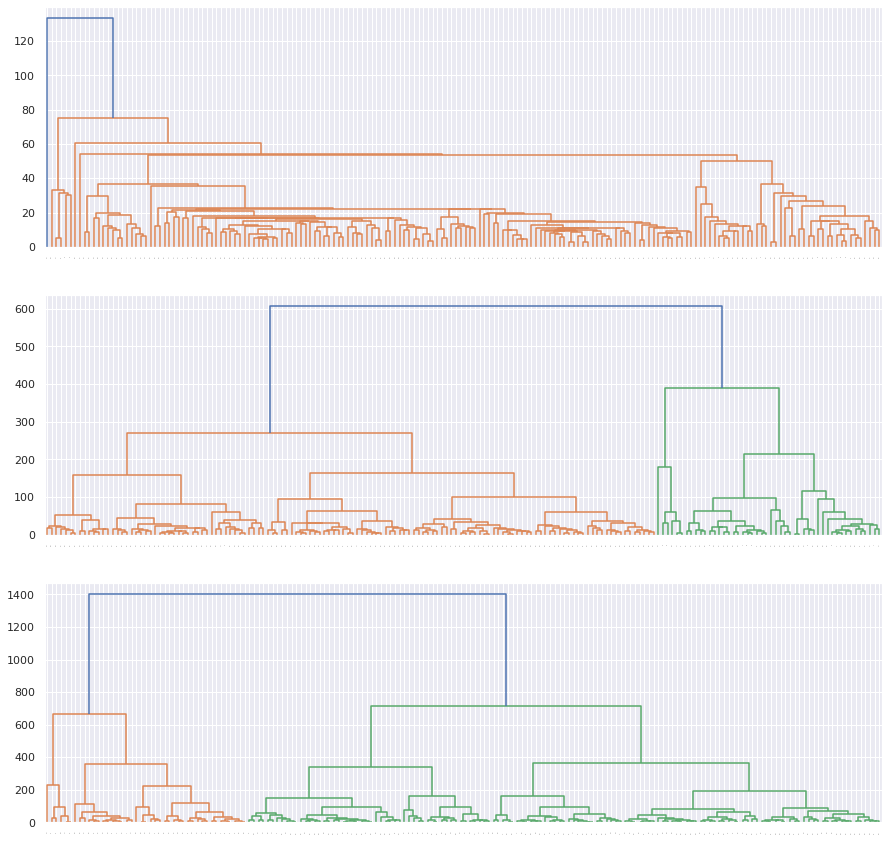

In [27]:
#fig값, 축값
fig, axes = plt. subplots(3, 1)
fig.set_size_inches(15, 15) # 인치값을 사용함 덴더그램

ax1 = dendrogram(clusters_single, leaf_font_size=0, ax=axes[0])
ax2 = dendrogram(clusters_average, leaf_font_size=0, ax=axes[1])
ax3 = dendrogram(clusters_complete, leaf_font_size=0, ax=axes[2])
plt.show()

In [29]:
# single 은 한쪽에치우쳐서 wine데이터에 맞지않고  
# average, complete 이쁘게 그려지지 않아서 문제가 조금 있다
# 그림으로 봤을 때 k값을 3개, 4개 정도 하면 될 것 같음

In [30]:
# 13개의 feature많고 차원을 축소하려면 scaler 필요함

- wine 데이터셋의 특성상 single linkage는 피해야 한다
- 군집의 수는 3또는 4가 적당해 보인다

## 데이터 전처리 - 피처 스케일링과 PCA

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.loc[:, :] = scaler.fit_transform(data)
df.describe().loc[['mean','std']]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,1.746418e-17,0.000000,3.742325e-18,-2.307767e-16,-1.995907e-17,-2.681999e-17,1.534353e-16,-6.860929e-17,4.865022e-17,2.869116e-17,1.334763e-16,5.114511e-17,2.619627e-17
std,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00


In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
# 0~1사이에 오면 비율의 신뢰도 (0.95 ~ 0.99)신뢰가 될 수있도록 축소  
# 0.99는 손실이 있을 수 있음
# 0.98로 함

In [43]:
data = pca.fit_transform(data)
data.shape

(178, 2)

##  Agglomerative Clustering - Single Linkage

In [58]:
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters = 3, linkage='single')
single_clusters = single_clustering.fit_predict(data)
single_clusters[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
tmp = pd.DataFrame(data, columns = ['pca1', 'pca2'])
tmp['single'] = single_clusters

In [65]:
tmp

,pca1,pca2,single
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,0
174,-2.601956,-1.757229,0
175,-2.677839,-2.760899,0
176,-2.387017,-2.297347,0


findfont: Font family ['malgun ghthic'] not found. Falling back to DejaVu Sans.


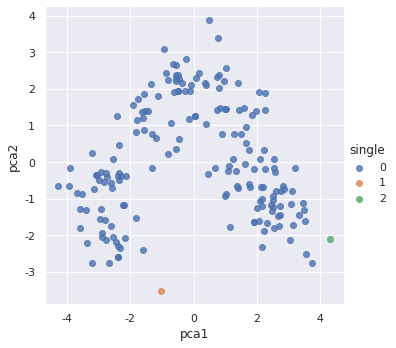

In [63]:
sns.lmplot(x='pca1', y='pca2', data=tmp, hue='single', fit_reg=False)

##  Agglomerative Clustering - Avarage Linkage

In [85]:
average_clustering = AgglomerativeClustering(n_clusters = 3, linkage='average')
average_clusters = average_clustering.fit_predict(data)
tmp['average'] = average_clusters

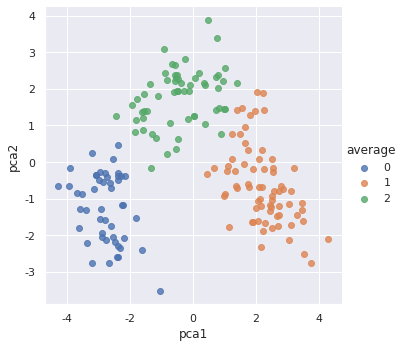

In [91]:
sns.lmplot(x='pca1', y='pca2', data=tmp, hue='average', fit_reg=False)

##  Agglomerative Clustering - Complete Linkage

In [97]:
from sklearn.cluster import AgglomerativeClustering
complete_clustering = AgglomerativeClustering(n_clusters = 3, linkage='complete')
complete_clusters = complete_clustering.fit_predict(data)
tmp['complete'] = complete_clusters

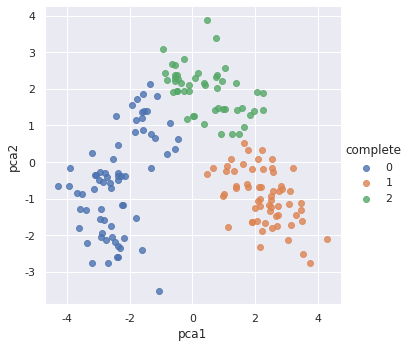

In [98]:
sns.lmplot(x='pca1', y='pca2', data=tmp, hue='complete', fit_reg=False)